In [122]:
import numpy as np
import librosa
import aubio
import matplotlib.pyplot as plt
import librosa.display
import pandas
import os

In [141]:
def extractAttr(filename,hopsize):
    attr = pandas.read_csv(filename,header=None)
    x = attr.iloc[:,0]
    y = attr.iloc[:,1]  
    length = int(3*44100/hopsize)
    x = x[0:length]
    y = y[0:length]
    return y

In [142]:
def boxplot(attr, path,hopsize):
    namearray = []
    valuesarray = [[]]
    maximum = 0
    minimum = 1000
    name = None
    x = 0
    for subdir, dirs, files in os.walk(path):
        if dirs != []:
            namearray.append(dirs)
        for filename in files:
            if filename.endswith(attr+".csv"):    
                filepath = filepath = subdir + os.sep + filename
                values = extractAttr(filepath,hopsize)
                for i in range(len(values)):
                    if values[i] > 0:
                        valuesarray[x].append(values[i])
        x=x+1
        valuesarray.append([])
        
    
    namearray = namearray[0]
    #plt.subplot(3,2,subplt)
    plt.figure(figsize=(5,3))
    plt.title(attr)
    plt.boxplot(valuesarray, 0, "")
    xtix = []
    xlabel = []
    for i in range(len(namearray)):
        xtix.append(i+2)
        xlabel.append(namearray[i])
    plt.xticks(xtix,xlabel)  
    plt.savefig(attr + '.png')
    plt.show()
    plt.tight_layout()

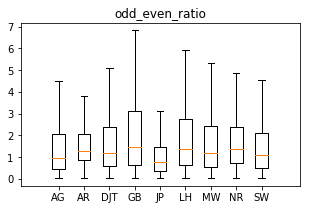

<Figure size 432x288 with 0 Axes>

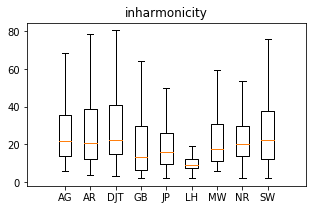

<Figure size 432x288 with 0 Axes>

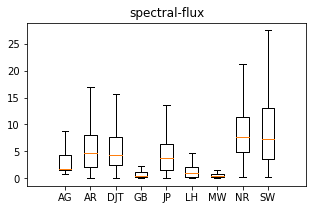

<Figure size 432x288 with 0 Axes>

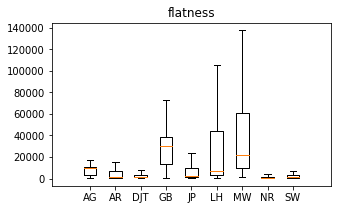

<Figure size 432x288 with 0 Axes>

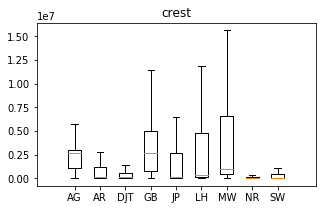

<Figure size 432x288 with 0 Axes>

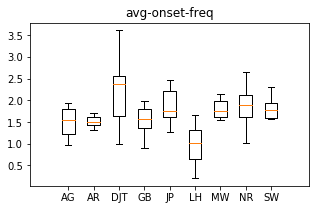

<Figure size 432x288 with 0 Axes>

In [143]:
path = '/Users/mattweisberg/GitHub/CompMusFall2018/Final_Project/Data/'
boxplot('odd_even_ratio',path, 256)
boxplot('inharmonicity',path, 256)
boxplot('spectral-flux',path, 32)
boxplot('flatness',path,256)
boxplot('crest', path,256)
boxplot('avg-onset-freq',path,256)